In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from pytictoc import TicToc
import math
import numpy.matlib

# 1번 문제

In [2]:
x = np.array([10,20,30,40,50])
print(x,'\n')

# np.max(), np.min()은 최대, 최소값을 찾아준다
print(np.max(x),'\n')
print(np.min(x),'\n')

# np.argmax(), np.argmin()은 최대, 최소값의 인덱스를 반환한다. 최대값 50은 5번째 자리에 위치해 있으므로 인덱스는 4이다. 
print(np.argmax(x))
print(np.argmin(x))

[10 20 30 40 50] 

50 

10 

4
0


In [3]:
x = np.array([[1,2],[3,4]])
z = np.array([[5,6],[7,8]])

# append는 배열을 이어 붙여준다. 
arr = np.append(x,z, axis=0)
print(arr)

arr2 = np.append(x,z, axis=1)
print(arr2)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


# 2번 문제

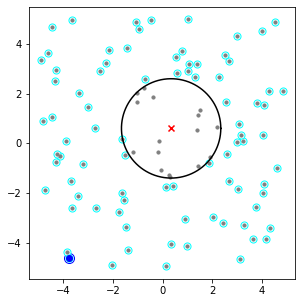

In [10]:
# 벡터의 차원
D = 2
# 랜덤으로 설정한 기준점
z = np.random.randn(D)
# 생성할 샘플의 개수
N = 100
# 기준이 되는 거리
d_star = 2

# BLANK1
X = np.random.rand(N,D)*(5-(-5))+(-5)

# BLANK2
Z = np.matlib.repmat(z.reshape(1,2), N,1) # X랑 동일한 shape으로 생성 즉, (100,2)차원으로 변경
dist = np.sqrt(np.sum((X - Z)**2, axis=1)) # 행렬의 각 원소의 차의 제곱   

dist_max = np.max(dist)
id_max = np.argmax(dist)
id_long = np.where(dist >= d_star)
theta = np.linspace(0,2*math.pi,100)
x1 = d_star*np.cos(theta) + z[0]
x2 = d_star*np.sin(theta) + z[1]
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)

# BLANK3
ax.set_aspect('equal')
plt.scatter(X[id_max, 0], X[id_max, 1], s=100, facecolor = 'w', edgecolor = 'b')
plt.scatter(X[id_long, 0], X[id_long, 1], s=50, facecolor = 'w', edgecolor = 'cyan')
plt.scatter(X[:,0], X[:,1], s=10, facecolor = 'gray')
plt.scatter(z[0], z[1], marker='x', facecolor='red')
plt.plot(x1,x2,color='k')
plt.scatter(X[id_max,0],X[id_max,1] , marker='o', facecolor='blue')

#plt.plot()

# 3번 문제

Elapsed time is 0.000971 seconds.
Elapsed time is 0.000656 seconds.
Elapsed time is 0.002975 seconds.
Elapsed time is 0.000114 seconds.
Elapsed time is 0.017350 seconds.
Elapsed time is 0.000350 seconds.
Elapsed time is 0.152995 seconds.
Elapsed time is 0.001531 seconds.
Elapsed time is 1.697339 seconds.
Elapsed time is 0.012822 seconds.
Elapsed time is 18.343613 seconds.
Elapsed time is 0.156648 seconds.


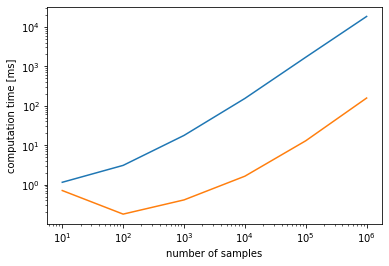

In [11]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from pytictoc import TicToc

# 벡터의 차원
D = 5

# 랜덤으로 설정한 기준점
z = np.random.randn(D)

# 생성할 샘플의 개수
Nset = np.array([10, 100, 1000, 10000, 100000, 1000000])

t = TicToc()
t1 = []
t2 = []

for N in Nset:
    X = np.random.rand(N,D) # X -> 10, 100, 1000, 10000, 100000, 1000000

    t.tic()
    dist1 = np.zeros(N)
    for n in range(0,N):
        #BLANK1
        dist1[n] = np.sqrt(np.sum((X[n,:]- z)**2))# X의 n번째 샘플을 기준점과 거리 계산
    t.toc()
    t1 = np.append(t1, t.tocvalue())

    t.tic()
    #BLANK2
    Z = np.matlib.repmat(z,N,1)
    dist2 = np.sqrt(np.sum((X-Z)**2, axis= 1))
    t.toc()
    t2 = np.append(t2, t.tocvalue()) 

    
plt.figure()
plt.plot(Nset, 1e3*t1)
plt.plot(Nset, 1e3*t2)
plt.xlabel("number of samples")
plt.ylabel("computation time [ms]")
plt.xscale("log")
plt.yscale("log")